### Chapter 1. 데이터 전처리

1. 데이터 불러오기
2. 데이터 타입 확인
3. 데이터 결측치 확인 (데이터 정제 I)
4. 데이터 결측치 대체 (데이터 정제 II)
5. 데이터 합치기
6. 데이터 인덱싱
7. 이탈 데이터 전처리 : 일별 데이터 -> 월별 데이터

In [1]:
import pandas as pd
import numpy as np
from pprint import pprint

import os

### 경로 관련

In [2]:
# 현재 프로세스의 작업 디렉토리 확인
cur_dir = os.getcwd()
print(cur_dir)

# 현재 작업파일의 경로에 있는 리스트 확인 -> 리스트로 반환
dir_list = os.listdir(cur_dir)
print(dir_list)

# 특정 경로의 폴더(디렉토리) 생성
# os.mkdir('test2')

# os.mkdir(cur_dir + '/tt')

# 지정한 파일의 이름을 변경
# os.rename('test33333333', 'test2')

# 지정된 경로의 디렉토리를 순차적으로 탐색 -> 주로 for문과 활용
# 경로, 폴더, 파일 형식으로 출력됨
for dirpath, folder, file in os.walk(cur_dir):
    print(dirpath, '\n', folder, '\n', file)

c:\Users\hslio\Desktop\Github\Genia\Study
['chapter 1. 실습용 코드.ipynb']
c:\Users\hslio\Desktop\Github\Genia\Study 
 [] 
 ['chapter 1. 실습용 코드.ipynb']


### 특정 경로의 파일 리스트 확인

In [3]:
path = 'D:/천재교육/2308_실무자특강_실습/'

In [4]:
# data_list = os.listdir('Dropout')[0:-1]
data_list = os.listdir(path + 'Dropout')[0:-1]
print("데이터셋 목록(data_list) : ", data_list)

데이터셋 목록(data_list) :  ['df1.csv', 'df2.csv', 'df3.csv', 'df4.csv', 'Dropout.csv', 'member.csv']


### 데이터 불러오기 type 1 -> dict 형태로 반환

In [5]:
cur_dir

'c:\\Users\\hslio\\Desktop\\Github\\Genia\\Study'

In [6]:
dataset = dict()

for data in data_list:
    dataset[data[0:-4]] = pd.read_csv(path + f'\\Dropout\\{data}', encoding='cp949')

In [7]:
dataset.keys()

dict_keys(['df1', 'df2', 'df3', 'df4', 'Dropout', 'member'])

### 데이터 불러오기 type 2 -> dataframe 형태로 각각 반환

In [ ]:
for i in dataset.keys():
    print(f'{i}😗')
    display(dataset[i])

### 데이터 합치기

In [128]:
dropout = pd.merge(dataset['member'], dataset['df1'], right_on='ID', left_on='ID')
dropout = pd.merge(dropout, dataset['df2'], right_on='ID', left_on='ID')
dropout = pd.merge(dropout, dataset['df3'], right_on='ID', left_on='ID')
dropout = pd.merge(dropout, dataset['df4'], right_on='ID', left_on='ID') 

### 테이블 컬럼 타입 확인

In [ ]:
dropout.dtypes

### 데이터프레임 내의 값 변경

In [134]:
def change_value(values):
    if values == 'Portuguese':
        return 1
    elif values == 'German':
        return 2
    elif values == 'Spanish':
        return 3
    elif values == 'Italian':
        return 4
    elif values == 'Dutch':
        return 5
    elif values == 'English':
        return 6
    elif values == 'Lithuanian':
        return 7
    elif values == 'Angolan':
        return 8
    elif values == 'Cape Verdean':
        return 9
    elif values == 'Guinean':
        return 10
    elif values == 'Mozambican':
        return 11
    elif values == 'Santomean':
        return 12
    elif values == 'Turkish':
        return 13
    elif values == 'Brazilian':
        return 14
    elif values == 'Romanian':
        return 15
    elif values == 'Moldova':
        return 16
    elif values == 'Mexican':
        return 17
    elif values == 'Ukrainian':
        return 18
    elif values == 'Russian':
        return 19
    elif values == 'Cuban':
        return 20
    elif values == 'Colombian':
        return 21

def change_value2(values):
    if values == 'Female':
        return 0
    elif values == 'Male':
        return 1


In [133]:
dropout.Gender.value_counts()

Female    2847
Male      1550
Name: Gender, dtype: int64

### 데이터 값 변경 version 1 -> 함수/apply 사용

In [ ]:
# dropout['Nacionality'] = dropout['Nacionality'].apply(change_value)
# dropout

### 데이터 컬럼 추가

#### - 빈 컬럼 생성 version 1
-> DataFrame['추가하고 싶은 컬럼명'] = '컬럼값'

In [ ]:
# dropout['Nationality'] = 0

#### - 빈 컬럼 생성 version 2
-> insert(loc = 넣고 싶은 새로운 컬럼의 위치, column = 추가하고 싶은 새로운 컬럼명, value = 새로운 컬럼의 값)

In [ ]:
# dropout.insert(loc = 2, column = 'Nationality_re', value = 999)
# dropout.drop(['Nationality_re', 'Nationality'], axis=1, inplace=True)

In [131]:
dropout.insert(loc = 2, column = 'Nationality', value = dropout['Nacionality'].apply(change_value))
dropout.drop(['Nacionality'], axis=1, inplace=True)
dropout['Gender'] = dropout['Gender'].apply(change_value2)

In [142]:
dropout

,ID,Nationality,Gender,Target,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,37c5fefa-df8e-4dcc-aec7-60000f2198e4,1.0,1.0,Dropout,1.0,8.0,5.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
1,37cf2ef2-2a6f-466a-a8cf-56a753bd8e71,1.0,1.0,Graduate,1.0,6.0,1.0,11.0,1.0,1.0,...,0.0,0.0,6.0,6.0,6.0,13.666667,0.0,13.9,-0.3,0.79
2,37ddd4c5-ab63-4b43-8df7-24e98f39f25b,1.0,1.0,Dropout,1.0,1.0,5.0,5.0,1.0,1.0,...,0.0,0.0,6.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
3,37fafa03-d77a-4723-89aa-84a8277379c5,1.0,0.0,Graduate,1.0,8.0,2.0,15.0,1.0,1.0,...,0.0,0.0,6.0,10.0,5.0,12.400000,0.0,9.4,-0.8,-3.12
4,382cc9e8-e885-4bcd-ae4d-a3846c35097b,1.0,0.0,Graduate,2.0,12.0,1.0,3.0,0.0,1.0,...,0.0,0.0,6.0,6.0,6.0,13.000000,0.0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,e7592d77-b53d-4496-a276-0fb6afdd7265,1.0,1.0,Graduate,1.0,1.0,6.0,15.0,1.0,1.0,...,0.0,0.0,6.0,8.0,5.0,12.666667,0.0,15.5,2.8,-4.06
4420,e76231d5-8450-4424-b344-daac4b02845b,19.0,0.0,Dropout,1.0,1.0,2.0,15.0,1.0,1.0,...,0.0,0.0,6.0,6.0,2.0,11.000000,0.0,11.1,0.6,2.02
4421,e77542f6-e166-46a6-ba62-903e0740631e,1.0,0.0,Dropout,1.0,1.0,1.0,12.0,1.0,1.0,...,0.0,0.0,8.0,9.0,1.0,13.500000,0.0,13.9,-0.3,0.79
4422,e7d809db-983c-4db5-b32a-64698a39a5aa,1.0,0.0,Graduate,1.0,1.0,1.0,9.0,1.0,1.0,...,0.0,0.0,5.0,6.0,5.0,12.000000,0.0,9.4,-0.8,-3.12


### 데이터 값 변경 version 2 -> loc 사용

In [ ]:
# dropout.loc[dropout['Nationality'] == 'Portuguese', 'Nationality'] = 1

In [ ]:
dropout.head()

### 컬럼별 중복 제거 개수

In [11]:
columns_info = dict()
columns = dropout.columns

for col in columns:
    columns_info[col] = len(dropout[col].unique())

pprint(columns_info, sort_dicts=False)

{'ID': 4424,
 'Nationality': 22,
 'Gender': 3,
 'Target': 4,
 'Marital status': 7,
 'Application mode': 19,
 'Application order': 9,
 'Course': 18,
 'Daytime/evening attendance': 3,
 'Previous qualification': 18,
 "Mother's qualification": 30,
 "Father's qualification": 35,
 "Mother's occupation": 33,
 "Father's occupation": 47,
 'Displaced': 3,
 'Educational special needs': 3,
 'Debtor': 3,
 'Tuition fees up to date': 3,
 'Scholarship holder': 3,
 'Age at enrollment': 47,
 'International': 3,
 'Education': 26,
 'Curricular units 1st sem (credited)': 22,
 'Curricular units 1st sem (enrolled)': 24,
 'Curricular units 1st sem (evaluations)': 36,
 'Curricular units 1st sem (approved)': 24,
 'Curricular units 1st sem (grade)': 790,
 'Curricular units 1st sem (without evaluations)': 12,
 'Curricular units 2nd sem (credited)': 20,
 'Curricular units 2nd sem (enrolled)': 23,
 'Curricular units 2nd sem (evaluations)': 31,
 'Curricular units 2nd sem (approved)': 21,
 'Curricular units 2nd sem (

### 데이터 컬럼 탐색

In [ ]:
# dropout = dropout.rename(columns = {'Nacionality' : 'Nationality'})
dropout_action_cnt = dropout.groupby(['Nationality', 'Target']).size().reset_index().pivot(columns='Target', index='Nationality', values=0)
dropout_action_cnt = dropout_action_cnt.rename(index = {1:'포르투칼', 2:'독일'})

In [ ]:
dropout_action_cnt

### 데이터 컬럼 타입 변경

In [143]:
dropout = dropout.astype({"Marital status" : 'object',
                         "Application mode" : 'object',
                         "Course" : 'object',
                         "Daytime/evening attendance" : 'object',
                         "Previous qualification" : 'object',
                         "Mother's qualification" : 'object',
                         "Father's qualification" : 'object',
                         "Mother's occupation" : 'object',
                         "Father's occupation" : 'object',
                         "Displaced" : 'object',
                         "Educational special needs" : 'object',
                         "Debtor" : 'object',
                         "Tuition fees up to date" : 'object',
                         "Scholarship holder" : 'object',
                         "International" : 'object'})
dropout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ID                                              4424 non-null   object 
 1   Nationality                                     4397 non-null   float64
 2   Gender                                          4397 non-null   float64
 3   Target                                          4416 non-null   object 
 4   Marital status                                  4405 non-null   object 
 5   Application mode                                4399 non-null   object 
 6   Application order                               4395 non-null   float64
 7   Course                                          4403 non-null   object 
 8   Daytime/evening attendance                      4407 non-null   object 
 9   Previous qualification                   

### 결측치 확인
- 컬럼별 결측 비율 확인

In [12]:
round((dropout.isnull().sum()/len(dropout)) * 100, 2)

ID                                                 0.00
Nationality                                        0.61
Gender                                             0.61
Target                                             0.18
Marital status                                     0.43
Application mode                                   0.57
Application order                                  0.66
Course                                             0.47
Daytime/evening attendance                         0.38
Previous qualification                             0.47
Mother's qualification                             0.57
Father's qualification                             0.61
Mother's occupation                                0.63
Father's occupation                                0.57
Displaced                                          0.61
Educational special needs                          0.86
Debtor                                             0.66
Tuition fees up to date                         

# ------------------------------------------------------------------------------------------------------------

## 결측치 처리

###  머신러닝 및 데이터 분석에서 상황과 목적에 맞게 처리해야 하는 중요한 프로세스 중 하나



1. 결측치 비율이 10% 미만인 경우
- 삭제 가능
<p>


2. 결측치 비율이 30% ~ 50%인 경우
- 삭제 위험
<p>


3. 결측치 비율이 50% 이상인 경우
- 데이터 자체에 대한 추가 검증 필요 or 해당 컬럼의 제거 고려
<p> 
    
==============================
### * 결측치를 처리하는 방법은 다양
    
1. 제거
- 한개 이상의 결측치가 있는 모든 행 제거
    
2. 대치
- 결측치를 특정값(평균, 최소, 최대, 최반값 등등)으로 대체
    
3. 보간법
- 추세를 결측치 이외의 값들을 선형적으로 같은 간격으로 처리 (시계열 데이터에 적합)

#### Target 변수에 결측치가 있는 행 일괄 제거
- target 변수에는 결측치가 있어서는 안된다!!!

In [12]:
# target 변수의 결측치 유무 확인 -> 데이터프레임 형태로 번환 후 확인

null_cnt_df = pd.DataFrame(dropout.isnull().sum()).rename(columns={0 : 'null_count'}).reset_index()
null_cnt_df['null_ratio'] = round((null_cnt_df['null_count'] / len(dropout))*100 , 2)
null_cnt_df

,index,null_count,null_ratio
0,ID,0,0.00
1,Nationality,27,0.61
2,Gender,27,0.61
3,Target,8,0.18
4,Marital status,19,0.43
5,Application mode,25,0.57
6,Application order,29,0.66
7,Course,21,0.47
8,Daytime/evening attendance,17,0.38
9,Previous qualification,21,0.47


In [13]:
print('Target 결측치 제거 전')
display(dropout[dropout['Target'].isna()])

# 결측치 제거
dropout.dropna(subset='Target', inplace=True)

print('Target 결측치 제거 후')
display(dropout[dropout['Target'].isna()])
print(dropout.shape)

Target 결측치 제거 전


,ID,Nationality,Gender,Target,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
250,5fc1c1cb-6ac2-43c9-9a51-7f99922463d4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
472,7e6e6287-813f-4404-b43e-59d73c2c6de8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
652,9c66f9e2-edfc-452c-b08f-94d0120f5df3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1443,1a235c75-5166-4cf5-b495-50f92479e73f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2292,9d74b27a-7e6e-4a1a-a420-6ebab9b5e064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3150,1ef15756-3d7b-4919-9375-f84dfeb4668b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3413,46e9e673-a0a3-4864-8d8a-8653527f3e07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4414,e6d883fa-82e5-488a-a790-efc762757ae3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Target 결측치 제거 후


,ID,Nationality,Gender,Target,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP


(4416, 37)


## * 결측치 1차 제거 -> 행 제거

- dropna() 함수 사용
1. axis = 0/1 (0 : 행, 1 : 열)
2. how = 'any' / 'all' (any : 행/열 중 하나라도 있는 경우 제거, all : 모든 행/열이 결측인 경우 제거)

3. dropna(thresh = num) : 행의 결측치 개수가 num개 이상인 행 제거

4. subset = 특정 변수 지정 / 지정하지 않을 경우 : 모든 columne & row에 적용

In [144]:
# 행을 기준으로 결측치가 2개 이상인 행 제거
nu_2 = (dropout.isnull().sum(axis=1) >= 2).sum()
print(f'행 기준 결측치 2개 이상인 row 개수 : {nu_2}')
print(f'결측치 제거 전 dropout shape : {dropout.shape}')

# 현재 비둘기 머리를 돌리기 위해 넘어가자
# dropout = dropout.dropna(thresh=2)
# print(f'결측치 제거 후 dropout shape : {dropout.shape}')

dropout_ = dropout[~(dropout.isnull().sum(axis=1) >= 2)]
print(f'결측치 제거 후 dropout shape : {dropout_.shape}')


행 기준 결측치 2개 이상인 row 개수 : 513
결측치 제거 전 dropout shape : (4424, 37)
결측치 제거 후 dropout shape : (3911, 37)


In [145]:
null_cnt_df = pd.DataFrame(dropout_.isnull().sum()).rename(columns={0 : 'null_count'}).reset_index()
null_cnt_df['null_ratio'] = round((null_cnt_df['null_count'] / len(dropout_))*100 , 2)
null_cnt_df

,index,null_count,null_ratio
0,ID,0,0.00
1,Nationality,0,0.00
2,Gender,0,0.00
3,Target,0,0.00
4,Marital status,1,0.03
5,Application mode,1,0.03
6,Application order,0,0.00
7,Course,0,0.00
8,Daytime/evening attendance,0,0.00
9,Previous qualification,1,0.03


In [41]:
# 행당 Null값 2개 이상인 애들 확인
(dropout_.isnull().sum(axis=1) >= 2).sum()

0

In [16]:
# 행을 기준으로 모두 결측인 case 제거

# 모든 행이 Null인 경우, 즉 행을 기준으로 Null 값이 Column 수와 같으면 제거
(dropout.isnull().sum(axis=1) >= 36).sum()

# 발견되지 않음 

0

In [146]:
# 약 4천개의 행중에서 3000개 이상 결측인 컬럼 제거 -> "Education" 컬럼 제거 됨
# 열 기준 3000개 이상 Null값 가진 컬럼 있는지 확인 출력
print(dropout_.isnull().sum(axis=0) >= 3000)
# 3000 이상 제거
dropout_.dropna(thresh=3000, axis=1, inplace=True)
dropout_

ID                                                False
Nationality                                       False
Gender                                            False
Target                                            False
Marital status                                    False
Application mode                                  False
Application order                                 False
Course                                            False
Daytime/evening attendance                        False
Previous qualification                            False
Mother's qualification                            False
Father's qualification                            False
Mother's occupation                               False
Father's occupation                               False
Displaced                                         False
Educational special needs                         False
Debtor                                            False
Tuition fees up to date                         

C:\Users\hslio\AppData\Local\Temp\ipykernel_15572\1492512739.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropout_.dropna(thresh=3000, axis=1, inplace=True)


,ID,Nationality,Gender,Target,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,37c5fefa-df8e-4dcc-aec7-60000f2198e4,1.0,1.0,Dropout,1.0,8.0,5.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
1,37cf2ef2-2a6f-466a-a8cf-56a753bd8e71,1.0,1.0,Graduate,1.0,6.0,1.0,11.0,1.0,1.0,...,0.0,0.0,6.0,6.0,6.0,13.666667,0.0,13.9,-0.3,0.79
2,37ddd4c5-ab63-4b43-8df7-24e98f39f25b,1.0,1.0,Dropout,1.0,1.0,5.0,5.0,1.0,1.0,...,0.0,0.0,6.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
3,37fafa03-d77a-4723-89aa-84a8277379c5,1.0,0.0,Graduate,1.0,8.0,2.0,15.0,1.0,1.0,...,0.0,0.0,6.0,10.0,5.0,12.400000,0.0,9.4,-0.8,-3.12
4,382cc9e8-e885-4bcd-ae4d-a3846c35097b,1.0,0.0,Graduate,2.0,12.0,1.0,3.0,0.0,1.0,...,0.0,0.0,6.0,6.0,6.0,13.000000,0.0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,e7592d77-b53d-4496-a276-0fb6afdd7265,1.0,1.0,Graduate,1.0,1.0,6.0,15.0,1.0,1.0,...,0.0,0.0,6.0,8.0,5.0,12.666667,0.0,15.5,2.8,-4.06
4420,e76231d5-8450-4424-b344-daac4b02845b,19.0,0.0,Dropout,1.0,1.0,2.0,15.0,1.0,1.0,...,0.0,0.0,6.0,6.0,2.0,11.000000,0.0,11.1,0.6,2.02
4421,e77542f6-e166-46a6-ba62-903e0740631e,1.0,0.0,Dropout,1.0,1.0,1.0,12.0,1.0,1.0,...,0.0,0.0,8.0,9.0,1.0,13.500000,0.0,13.9,-0.3,0.79
4422,e7d809db-983c-4db5-b32a-64698a39a5aa,1.0,0.0,Graduate,1.0,1.0,1.0,9.0,1.0,1.0,...,0.0,0.0,5.0,6.0,5.0,12.000000,0.0,9.4,-0.8,-3.12


In [23]:
dropout_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3911 entries, 0 to 4423
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ID                                              3911 non-null   object 
 1   Nationality                                     3911 non-null   float64
 2   Gender                                          3911 non-null   object 
 3   Target                                          3911 non-null   object 
 4   Marital status                                  3910 non-null   object 
 5   Application mode                                3910 non-null   object 
 6   Application order                               3911 non-null   float64
 7   Course                                          3911 non-null   object 
 8   Daytime/evening attendance                      3911 non-null   object 
 9   Previous qualification                   

## * 결측치 특정값 대치(imputation)

1. 최빈값 : 범주형 변수의 경우 (가장 비율이 높은 범주로 대치 가능)

2. 중앙값 : 연속형 변수의 경우 중앙값으로 대치 가능

3. 평균 : 연속형 변수의 경우 평균값으로 대치 가능

4. 임의 지정 : 사용자가 원하는 수치로 대치 가능

### 특정값 대치 version 1 -> fillna() 함수 사용

#### 타입별 컬럼 리스트 재정의
- 1. float64 타입에 해당하는 컬럼 리스트 반환
- 2. Object 타입에 해당하는 컬럼 리스트 반환

In [147]:
dropout = dropout_

In [25]:
# 각 타입별 컬럼 리스트를 딕셔너리 형태로 반환

# ex) {'object' : ['col1', 'col2'...], 'float64' : ['col3', 'col4'...]}
type_lst = dict({'Object': [], 'Float64' : []})
o_lst = []
f_lst = []

for i in dropout:
    if dropout[i].dtype == 'O':
        o_lst.append(i)
    else:
        f_lst.append(i)

type_lst['Object'] = o_lst
type_lst['Float64'] = f_lst

In [26]:
# float64 타입에 해당하는 컬럼 리스트 반환
pprint(type_lst['Float64'])

# object 타입에 해당하는 컬럼 리스트 반환
pprint(type_lst['Object'])

['Nationality',
 'Application order',
 'Age at enrollment',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation rate',
 'GDP']
['ID',
 'Gender',
 'Target',
 'Marital status',
 'Application mode',
 'Course',
 'Daytime/evening attendance',
 'Previous qualification',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Scholarship holder',
 'International']


### * float 타입 컬럼 결측치 대치

#### 1. float64 타입의 컬럼의 결측치를 모두 각 컬럼의 평균값으로 대치

In [27]:
# Float64 type Null data index 추출
dropout_float = dropout[type_lst['Float64']]
f_null_index = dropout_float[dropout_float.isnull().any(axis=1)].index

In [29]:
# # Null값 확인 + 평균으로 채워진 것 확인
display(dropout.loc[f_null_index])
display(dropout_float.fillna(dropout_float.mean()).loc[f_null_index])

,ID,Nationality,Gender,Target,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
11,39cea137-8501-4481-bfe8-67ba8660f698,1.0,Female,Graduate,1.0,1.0,1.0,12.0,1.0,1.0,...,0.0,0.0,8.0,8.0,7.0,NaN,0.0,12.7,3.7,-1.70
15,3a6fe19a-ef47-49b1-af16-80bdf527fdcb,1.0,Female,Dropout,1.0,1.0,1.0,15.0,1.0,1.0,...,0.0,NaN,6.0,7.0,0.0,0.000000,0.0,15.5,2.8,-4.06
288,6551efab-d935-4d2a-8883-8a66e2488817,1.0,Female,Graduate,1.0,9.0,2.0,3.0,0.0,1.0,...,0.0,0.0,6.0,9.0,6.0,11.500000,0.0,10.8,1.4,1.74
1800,524c7a20-a1cc-4138-8a12-5c5cd37db272,1.0,Male,Dropout,1.0,1.0,3.0,12.0,1.0,1.0,...,1.0,0.0,8.0,15.0,5.0,12.288000,1.0,NaN,1.4,1.74
1801,529094c2-d0e2-4b31-a846-a5bac691aaaa,1.0,Male,Graduate,1.0,14.0,2.0,3.0,0.0,3.0,...,0.0,6.0,10.0,13.0,7.0,13.285714,2.0,7.6,2.6,0.32
2707,db35cc4b-b2e0-4d41-8d21-05c29c584dc2,1.0,Male,Dropout,1.0,1.0,1.0,9.0,1.0,1.0,...,0.0,0.0,5.0,5.0,0.0,0.000000,0.0,12.7,3.7,NaN
3768,7c5ebe03-bcef-4b70-9aff-dc1e72ae1cfd,1.0,Female,Enrolled,1.0,1.0,3.0,16.0,1.0,1.0,...,0.0,0.0,6.0,8.0,5.0,11.600000,0.0,7.6,2.6,0.32
4142,ba389a1c-e8c4-433e-bc92-172a48b86585,1.0,Female,Graduate,1.0,14.0,1.0,3.0,0.0,9.0,...,0.0,0.0,6.0,7.0,6.0,11.000000,0.0,7.6,2.6,0.32
4407,e6607e3f-7fb9-4702-ba38-bd91d22558d7,1.0,Male,Graduate,1.0,1.0,1.0,15.0,1.0,1.0,...,0.0,0.0,6.0,7.0,6.0,13.285714,0.0,15.5,2.8,-4.06


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
11,1.0,1.0,18.0,0.0,8.000000,8.000000,7.00000,13.214286,0.0,0.000000,8.0,8.0,7.0,10.219073,0.0,12.700000,3.7,-1.700000
15,1.0,1.0,20.0,0.0,6.000000,6.000000,5.00000,13.200000,0.0,0.541432,6.0,7.0,0.0,0.000000,0.0,15.500000,2.8,-4.060000
288,1.0,2.0,19.0,0.0,6.274495,8.000000,6.00000,10.833333,0.0,0.000000,6.0,9.0,6.0,11.500000,0.0,10.800000,1.4,1.740000
1800,1.0,3.0,18.0,0.0,8.000000,15.000000,5.00000,12.288000,1.0,0.000000,8.0,15.0,5.0,12.288000,1.0,11.549847,1.4,1.740000
1801,1.0,2.0,31.0,8.0,12.000000,21.000000,4.69821,12.333333,0.0,6.000000,10.0,13.0,7.0,13.285714,2.0,7.600000,2.6,0.320000
2707,1.0,1.0,20.0,0.0,5.000000,5.000000,0.00000,0.000000,0.0,0.000000,5.0,5.0,0.0,0.000000,0.0,12.700000,3.7,0.020256
3768,1.0,3.0,23.0,0.0,6.000000,8.000000,5.00000,10.633697,0.0,0.000000,6.0,8.0,5.0,11.600000,0.0,7.600000,2.6,0.320000
4142,1.0,1.0,29.0,0.0,6.274495,10.000000,6.00000,11.666667,0.0,0.000000,6.0,7.0,6.0,11.000000,0.0,7.600000,2.6,0.320000
4407,1.0,1.0,18.0,0.0,6.000000,8.308951,6.00000,12.833333,0.0,0.000000,6.0,7.0,6.0,13.285714,0.0,15.500000,2.8,-4.060000


#### 2. float64 타입의 컬럼의 결측치를 모두 각 컬럼의 최대값으로 대치

- idxmax() : 최대값을 가지는 인덱스 레이블을 출력
- max() : 최대값 출력

In [30]:
print(dropout[type_lst['Float64']].idxmax())
print(dropout[type_lst['Float64']].max())

Nationality                                       1618
Application order                                 2629
Age at enrollment                                  689
Curricular units 1st sem (credited)               2863
Curricular units 1st sem (enrolled)               3961
Curricular units 1st sem (evaluations)             747
Curricular units 1st sem (approved)               3961
Curricular units 1st sem (grade)                  2443
Curricular units 1st sem (without evaluations)     747
Curricular units 2nd sem (credited)               2863
Curricular units 2nd sem (enrolled)               2476
Curricular units 2nd sem (evaluations)            3635
Curricular units 2nd sem (approved)               2476
Curricular units 2nd sem (grade)                  1283
Curricular units 2nd sem (without evaluations)    3635
Unemployment rate                                    5
Inflation rate                                      11
GDP                                                  9
dtype: int

In [43]:
# 최대값 가지는 index 추출
f_max_index = dropout.loc[dropout[type_lst['Float64']].idxmax()]
f_max_index

,ID,Nationality,Gender,Target,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
1618,334414b6-3e38-43c8-a6b1-5fd2a1a6161b,21.0,Female,Dropout,1.0,1.0,2.0,15.0,1.0,1.0,...,0.0,0.0,6.0,6.0,6.0,13.000000,0.0,11.1,0.6,2.02
2629,d07c272a-44e4-4d88-9112-e619695ea92d,1.0,Male,Enrolled,1.0,12.0,9.0,17.0,0.0,1.0,...,0.0,0.0,5.0,7.0,5.0,14.333333,0.0,10.8,1.4,1.74
689,a1393a2f-0eff-4b3c-b0fd-81256738b1ef,1.0,Male,Dropout,4.0,12.0,2.0,9.0,1.0,12.0,...,0.0,0.0,5.0,9.0,0.0,0.000000,0.0,10.8,1.4,1.74
2863,f19eea23-1a93-4909-b551-a861d63c3f82,1.0,Female,Graduate,1.0,14.0,1.0,16.0,1.0,1.0,...,0.0,19.0,19.0,19.0,19.0,12.105263,0.0,12.4,0.5,1.79
3961,9e7ac219-b828-412b-8e0e-8848fddd2bfa,1.0,Female,Graduate,1.0,13.0,1.0,12.0,1.0,1.0,...,0.0,14.0,17.0,17.0,17.0,15.023529,0.0,15.5,2.8,-4.06
747,aa81dd13-c262-4eae-9e74-b6aafefd9792,11.0,Male,Graduate,1.0,14.0,1.0,6.0,1.0,1.0,...,12.0,10.0,13.0,26.0,12.0,11.428571,6.0,15.5,2.8,-4.06
3961,9e7ac219-b828-412b-8e0e-8848fddd2bfa,1.0,Female,Graduate,1.0,13.0,1.0,12.0,1.0,1.0,...,0.0,14.0,17.0,17.0,17.0,15.023529,0.0,15.5,2.8,-4.06
2443,b6261677-84fa-48b0-a6e4-13c6d9bf4d66,1.0,Male,Graduate,2.0,12.0,1.0,4.0,1.0,3.0,...,0.0,6.0,12.0,14.0,12.0,17.692308,0.0,16.2,0.3,-0.92
747,aa81dd13-c262-4eae-9e74-b6aafefd9792,11.0,Male,Graduate,1.0,14.0,1.0,6.0,1.0,1.0,...,12.0,10.0,13.0,26.0,12.0,11.428571,6.0,15.5,2.8,-4.06
2863,f19eea23-1a93-4909-b551-a861d63c3f82,1.0,Female,Graduate,1.0,14.0,1.0,16.0,1.0,1.0,...,0.0,19.0,19.0,19.0,19.0,12.105263,0.0,12.4,0.5,1.79


In [44]:
# Null값 확인 + 최대값으로 채워진 것 확인
display(dropout_float[dropout_float.isnull().any(axis=1)])
display(dropout_float.fillna(dropout_float.max()).loc[f_null_index])

,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
11,1.0,1.0,18.0,0.0,8.0,8.0,7.0,13.214286,0.0,0.0,8.0,8.0,7.0,NaN,0.0,12.7,3.7,-1.70
15,1.0,1.0,20.0,0.0,6.0,6.0,5.0,13.200000,0.0,NaN,6.0,7.0,0.0,0.000000,0.0,15.5,2.8,-4.06
288,1.0,2.0,19.0,0.0,NaN,8.0,6.0,10.833333,0.0,0.0,6.0,9.0,6.0,11.500000,0.0,10.8,1.4,1.74
1800,1.0,3.0,18.0,0.0,8.0,15.0,5.0,12.288000,1.0,0.0,8.0,15.0,5.0,12.288000,1.0,NaN,1.4,1.74
1801,1.0,2.0,31.0,8.0,12.0,21.0,NaN,12.333333,0.0,6.0,10.0,13.0,7.0,13.285714,2.0,7.6,2.6,0.32
2707,1.0,1.0,20.0,0.0,5.0,5.0,0.0,0.000000,0.0,0.0,5.0,5.0,0.0,0.000000,0.0,12.7,3.7,NaN
3768,1.0,3.0,23.0,0.0,6.0,8.0,5.0,NaN,0.0,0.0,6.0,8.0,5.0,11.600000,0.0,7.6,2.6,0.32
4142,1.0,1.0,29.0,0.0,NaN,10.0,6.0,11.666667,0.0,0.0,6.0,7.0,6.0,11.000000,0.0,7.6,2.6,0.32
4407,1.0,1.0,18.0,0.0,6.0,NaN,6.0,12.833333,0.0,0.0,6.0,7.0,6.0,13.285714,0.0,15.5,2.8,-4.06


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
11,1.0,1.0,18.0,0.0,8.0,8.0,7.0,13.214286,0.0,0.0,8.0,8.0,7.0,18.571429,0.0,12.7,3.7,-1.70
15,1.0,1.0,20.0,0.0,6.0,6.0,5.0,13.200000,0.0,19.0,6.0,7.0,0.0,0.000000,0.0,15.5,2.8,-4.06
288,1.0,2.0,19.0,0.0,26.0,8.0,6.0,10.833333,0.0,0.0,6.0,9.0,6.0,11.500000,0.0,10.8,1.4,1.74
1800,1.0,3.0,18.0,0.0,8.0,15.0,5.0,12.288000,1.0,0.0,8.0,15.0,5.0,12.288000,1.0,16.2,1.4,1.74
1801,1.0,2.0,31.0,8.0,12.0,21.0,26.0,12.333333,0.0,6.0,10.0,13.0,7.0,13.285714,2.0,7.6,2.6,0.32
2707,1.0,1.0,20.0,0.0,5.0,5.0,0.0,0.000000,0.0,0.0,5.0,5.0,0.0,0.000000,0.0,12.7,3.7,3.51
3768,1.0,3.0,23.0,0.0,6.0,8.0,5.0,18.875000,0.0,0.0,6.0,8.0,5.0,11.600000,0.0,7.6,2.6,0.32
4142,1.0,1.0,29.0,0.0,26.0,10.0,6.0,11.666667,0.0,0.0,6.0,7.0,6.0,11.000000,0.0,7.6,2.6,0.32
4407,1.0,1.0,18.0,0.0,6.0,45.0,6.0,12.833333,0.0,0.0,6.0,7.0,6.0,13.285714,0.0,15.5,2.8,-4.06


#### 3. float64 타입의 컬럼의 결측치를 모두 각 컬럼의 최소값으로 대치
- idxmin() : 최소값을 가지는 인덱스 레이블을 출력
- min() : 최소값을 출력

In [46]:
print(dropout[type_lst['Float64']].idxmax())
print(dropout[type_lst['Float64']].max())

Nationality                                       1618
Application order                                 2629
Age at enrollment                                  689
Curricular units 1st sem (credited)               2863
Curricular units 1st sem (enrolled)               3961
Curricular units 1st sem (evaluations)             747
Curricular units 1st sem (approved)               3961
Curricular units 1st sem (grade)                  2443
Curricular units 1st sem (without evaluations)     747
Curricular units 2nd sem (credited)               2863
Curricular units 2nd sem (enrolled)               2476
Curricular units 2nd sem (evaluations)            3635
Curricular units 2nd sem (approved)               2476
Curricular units 2nd sem (grade)                  1283
Curricular units 2nd sem (without evaluations)    3635
Unemployment rate                                    5
Inflation rate                                      11
GDP                                                  9
dtype: int

In [47]:
# Null값 확인 + 최소값으로 채워진 것 확인
display(dropout_float.loc[f_null_index])
display(dropout_float.fillna(dropout_float.min()).loc[f_null_index])

,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
11,1.0,1.0,18.0,0.0,8.0,8.0,7.0,13.214286,0.0,0.0,8.0,8.0,7.0,NaN,0.0,12.7,3.7,-1.70
15,1.0,1.0,20.0,0.0,6.0,6.0,5.0,13.200000,0.0,NaN,6.0,7.0,0.0,0.000000,0.0,15.5,2.8,-4.06
288,1.0,2.0,19.0,0.0,NaN,8.0,6.0,10.833333,0.0,0.0,6.0,9.0,6.0,11.500000,0.0,10.8,1.4,1.74
1800,1.0,3.0,18.0,0.0,8.0,15.0,5.0,12.288000,1.0,0.0,8.0,15.0,5.0,12.288000,1.0,NaN,1.4,1.74
1801,1.0,2.0,31.0,8.0,12.0,21.0,NaN,12.333333,0.0,6.0,10.0,13.0,7.0,13.285714,2.0,7.6,2.6,0.32
2707,1.0,1.0,20.0,0.0,5.0,5.0,0.0,0.000000,0.0,0.0,5.0,5.0,0.0,0.000000,0.0,12.7,3.7,NaN
3768,1.0,3.0,23.0,0.0,6.0,8.0,5.0,NaN,0.0,0.0,6.0,8.0,5.0,11.600000,0.0,7.6,2.6,0.32
4142,1.0,1.0,29.0,0.0,NaN,10.0,6.0,11.666667,0.0,0.0,6.0,7.0,6.0,11.000000,0.0,7.6,2.6,0.32
4407,1.0,1.0,18.0,0.0,6.0,NaN,6.0,12.833333,0.0,0.0,6.0,7.0,6.0,13.285714,0.0,15.5,2.8,-4.06


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
11,1.0,1.0,18.0,0.0,8.0,8.0,7.0,13.214286,0.0,0.0,8.0,8.0,7.0,0.000000,0.0,12.7,3.7,-1.70
15,1.0,1.0,20.0,0.0,6.0,6.0,5.0,13.200000,0.0,0.0,6.0,7.0,0.0,0.000000,0.0,15.5,2.8,-4.06
288,1.0,2.0,19.0,0.0,0.0,8.0,6.0,10.833333,0.0,0.0,6.0,9.0,6.0,11.500000,0.0,10.8,1.4,1.74
1800,1.0,3.0,18.0,0.0,8.0,15.0,5.0,12.288000,1.0,0.0,8.0,15.0,5.0,12.288000,1.0,7.6,1.4,1.74
1801,1.0,2.0,31.0,8.0,12.0,21.0,0.0,12.333333,0.0,6.0,10.0,13.0,7.0,13.285714,2.0,7.6,2.6,0.32
2707,1.0,1.0,20.0,0.0,5.0,5.0,0.0,0.000000,0.0,0.0,5.0,5.0,0.0,0.000000,0.0,12.7,3.7,-4.06
3768,1.0,3.0,23.0,0.0,6.0,8.0,5.0,0.000000,0.0,0.0,6.0,8.0,5.0,11.600000,0.0,7.6,2.6,0.32
4142,1.0,1.0,29.0,0.0,0.0,10.0,6.0,11.666667,0.0,0.0,6.0,7.0,6.0,11.000000,0.0,7.6,2.6,0.32
4407,1.0,1.0,18.0,0.0,6.0,0.0,6.0,12.833333,0.0,0.0,6.0,7.0,6.0,13.285714,0.0,15.5,2.8,-4.06


#### 4. float64 타입의 컬럼의 결측치를 모두 각 컬럼의 최빈값으로 대치 version 1 -> -> value_counts() + idxmax() 함수 사용

In [55]:
dropout_float

,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1.0,5.0,20.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
1,1.0,1.0,19.0,0.0,6.0,6.0,6.0,14.000000,0.0,0.0,6.0,6.0,6.0,13.666667,0.0,13.9,-0.3,0.79
2,1.0,5.0,19.0,0.0,6.0,0.0,0.0,0.000000,0.0,0.0,6.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
3,1.0,2.0,20.0,0.0,6.0,8.0,6.0,13.428571,0.0,0.0,6.0,10.0,5.0,12.400000,0.0,9.4,-0.8,-3.12
4,1.0,1.0,45.0,0.0,6.0,9.0,5.0,12.333333,0.0,0.0,6.0,6.0,6.0,13.000000,0.0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1.0,6.0,19.0,0.0,6.0,7.0,5.0,13.600000,0.0,0.0,6.0,8.0,5.0,12.666667,0.0,15.5,2.8,-4.06
4420,19.0,2.0,18.0,0.0,6.0,6.0,6.0,12.000000,0.0,0.0,6.0,6.0,2.0,11.000000,0.0,11.1,0.6,2.02
4421,1.0,1.0,30.0,0.0,7.0,8.0,7.0,14.912500,0.0,0.0,8.0,9.0,1.0,13.500000,0.0,13.9,-0.3,0.79
4422,1.0,1.0,20.0,0.0,5.0,5.0,5.0,13.800000,0.0,0.0,5.0,6.0,5.0,12.000000,0.0,9.4,-0.8,-3.12


In [87]:
dropout_float[dropout_float['Nationality'].isnull()]

,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP


In [93]:
# Null값 확인 + 최빈값으로 채워진 것 확인

for i in dropout_float:
    display(dropout_float[dropout_float[i].isnull()])
    print(f'{i} columns의 최빈값은 {dropout_float[[i]].value_counts().idxmax()[0]}')
    i_null_index = dropout_float[dropout_float[i].isnull()].index
    display(dropout_float[[i]].fillna(dropout_float[[i]].value_counts().idxmax()[0]).loc[i_null_index])
    print('👻')

,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP


Nationality columns의 최빈값은 1.0


,Nationality


👻


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP


Application order columns의 최빈값은 1.0


,Application order


👻


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP


Age at enrollment columns의 최빈값은 18.0


,Age at enrollment


👻


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP


Curricular units 1st sem (credited) columns의 최빈값은 0.0


,Curricular units 1st sem (credited)


👻


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
288,1.0,2.0,19.0,0.0,NaN,8.0,6.0,10.833333,0.0,0.0,6.0,9.0,6.0,11.5,0.0,10.8,1.4,1.74
4142,1.0,1.0,29.0,0.0,NaN,10.0,6.0,11.666667,0.0,0.0,6.0,7.0,6.0,11.0,0.0,7.6,2.6,0.32


Curricular units 1st sem (enrolled) columns의 최빈값은 6.0


,Curricular units 1st sem (enrolled)
288,6.0
4142,6.0


👻


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
4407,1.0,1.0,18.0,0.0,6.0,NaN,6.0,12.833333,0.0,0.0,6.0,7.0,6.0,13.285714,0.0,15.5,2.8,-4.06


Curricular units 1st sem (evaluations) columns의 최빈값은 8.0


,Curricular units 1st sem (evaluations)
4407,8.0


👻


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
1801,1.0,2.0,31.0,8.0,12.0,21.0,NaN,12.333333,0.0,6.0,10.0,13.0,7.0,13.285714,2.0,7.6,2.6,0.32


Curricular units 1st sem (approved) columns의 최빈값은 6.0


,Curricular units 1st sem (approved)
1801,6.0


👻


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
3768,1.0,3.0,23.0,0.0,6.0,8.0,5.0,NaN,0.0,0.0,6.0,8.0,5.0,11.6,0.0,7.6,2.6,0.32


Curricular units 1st sem (grade) columns의 최빈값은 0.0


,Curricular units 1st sem (grade)
3768,0.0


👻


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP


Curricular units 1st sem (without evaluations) columns의 최빈값은 0.0


,Curricular units 1st sem (without evaluations)


👻


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
15,1.0,1.0,20.0,0.0,6.0,6.0,5.0,13.2,0.0,NaN,6.0,7.0,0.0,0.0,0.0,15.5,2.8,-4.06


Curricular units 2nd sem (credited) columns의 최빈값은 0.0


,Curricular units 2nd sem (credited)
15,0.0


👻


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP


Curricular units 2nd sem (enrolled) columns의 최빈값은 6.0


,Curricular units 2nd sem (enrolled)


👻


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP


Curricular units 2nd sem (evaluations) columns의 최빈값은 8.0


,Curricular units 2nd sem (evaluations)


👻


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP


Curricular units 2nd sem (approved) columns의 최빈값은 6.0


,Curricular units 2nd sem (approved)


👻


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
11,1.0,1.0,18.0,0.0,8.0,8.0,7.0,13.214286,0.0,0.0,8.0,8.0,7.0,NaN,0.0,12.7,3.7,-1.7


Curricular units 2nd sem (grade) columns의 최빈값은 0.0


,Curricular units 2nd sem (grade)
11,0.0


👻


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP


Curricular units 2nd sem (without evaluations) columns의 최빈값은 0.0


,Curricular units 2nd sem (without evaluations)


👻


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
1800,1.0,3.0,18.0,0.0,8.0,15.0,5.0,12.288,1.0,0.0,8.0,15.0,5.0,12.288,1.0,NaN,1.4,1.74


Unemployment rate columns의 최빈값은 7.6


,Unemployment rate
1800,7.6


👻


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP


Inflation rate columns의 최빈값은 1.4


,Inflation rate


👻


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
2707,1.0,1.0,20.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,12.7,3.7,NaN


GDP columns의 최빈값은 0.32


,GDP
2707,0.32


👻


#### 5. float64 타입의 컬럼의 결측치를 모두 각 컬럼의 최빈값으로 대치 version 2 -> mode() 함수 사용

In [103]:
dropout_float['Nationality'].mode()[0]

1.0

In [105]:
# Null값 확인 + 최빈값으로 채워진 것 확인

for i in dropout_float:
    display(dropout_float[dropout_float[i].isnull()])
    print(f'{i} columns의 최빈값은 {dropout_float[i].mode()[0]}')
    i_null_index = dropout_float[dropout_float[i].isnull()].index
    display(dropout_float[[i]].fillna(dropout_float[i].mode()[0]).loc[i_null_index])
    print('👻')

,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP


Nationality columns의 최빈값은 1.0


,Nationality


👻


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP


Application order columns의 최빈값은 1.0


,Application order


👻


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP


Age at enrollment columns의 최빈값은 18.0


,Age at enrollment


👻


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP


Curricular units 1st sem (credited) columns의 최빈값은 0.0


,Curricular units 1st sem (credited)


👻


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
288,1.0,2.0,19.0,0.0,NaN,8.0,6.0,10.833333,0.0,0.0,6.0,9.0,6.0,11.5,0.0,10.8,1.4,1.74
4142,1.0,1.0,29.0,0.0,NaN,10.0,6.0,11.666667,0.0,0.0,6.0,7.0,6.0,11.0,0.0,7.6,2.6,0.32


Curricular units 1st sem (enrolled) columns의 최빈값은 6.0


,Curricular units 1st sem (enrolled)
288,6.0
4142,6.0


👻


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
4407,1.0,1.0,18.0,0.0,6.0,NaN,6.0,12.833333,0.0,0.0,6.0,7.0,6.0,13.285714,0.0,15.5,2.8,-4.06


Curricular units 1st sem (evaluations) columns의 최빈값은 8.0


,Curricular units 1st sem (evaluations)
4407,8.0


👻


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
1801,1.0,2.0,31.0,8.0,12.0,21.0,NaN,12.333333,0.0,6.0,10.0,13.0,7.0,13.285714,2.0,7.6,2.6,0.32


Curricular units 1st sem (approved) columns의 최빈값은 6.0


,Curricular units 1st sem (approved)
1801,6.0


👻


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
3768,1.0,3.0,23.0,0.0,6.0,8.0,5.0,NaN,0.0,0.0,6.0,8.0,5.0,11.6,0.0,7.6,2.6,0.32


Curricular units 1st sem (grade) columns의 최빈값은 0.0


,Curricular units 1st sem (grade)
3768,0.0


👻


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP


Curricular units 1st sem (without evaluations) columns의 최빈값은 0.0


,Curricular units 1st sem (without evaluations)


👻


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
15,1.0,1.0,20.0,0.0,6.0,6.0,5.0,13.2,0.0,NaN,6.0,7.0,0.0,0.0,0.0,15.5,2.8,-4.06


Curricular units 2nd sem (credited) columns의 최빈값은 0.0


,Curricular units 2nd sem (credited)
15,0.0


👻


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP


Curricular units 2nd sem (enrolled) columns의 최빈값은 6.0


,Curricular units 2nd sem (enrolled)


👻


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP


Curricular units 2nd sem (evaluations) columns의 최빈값은 8.0


,Curricular units 2nd sem (evaluations)


👻


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP


Curricular units 2nd sem (approved) columns의 최빈값은 6.0


,Curricular units 2nd sem (approved)


👻


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
11,1.0,1.0,18.0,0.0,8.0,8.0,7.0,13.214286,0.0,0.0,8.0,8.0,7.0,NaN,0.0,12.7,3.7,-1.7


Curricular units 2nd sem (grade) columns의 최빈값은 0.0


,Curricular units 2nd sem (grade)
11,0.0


👻


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP


Curricular units 2nd sem (without evaluations) columns의 최빈값은 0.0


,Curricular units 2nd sem (without evaluations)


👻


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
1800,1.0,3.0,18.0,0.0,8.0,15.0,5.0,12.288,1.0,0.0,8.0,15.0,5.0,12.288,1.0,NaN,1.4,1.74


Unemployment rate columns의 최빈값은 7.6


,Unemployment rate
1800,7.6


👻


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP


Inflation rate columns의 최빈값은 1.4


,Inflation rate


👻


,Nationality,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
2707,1.0,1.0,20.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,12.7,3.7,NaN


GDP columns의 최빈값은 0.32


,GDP
2707,0.32


👻


#### 6. float64 타입의 컬럼의 결측치를 모두 각 컬럼의 바로 위 값으로 대치 -> fillna(method = 'ffill')
- 데이터 특성상 서로 이웃한 데이터끼리 유사성이 높을 수 있다고 간주될 때 사용

#### 7. float64 타입의 컬럼의 결측치를 모두 각 컬럼의 바로 아래 값으로 대치 -> fillna(method = 'bfill')
- 데이터 특성상 서로 이웃한 데이터끼리 유사성이 높을 수 있다고 간주될 때 사용

#### 8. float 타입의 컬럼의 결측치를 분석가가 원하는 수치로 대치 가능 -> replace() 함수 사용
- to_replace : 바꾸고 싶은 값
- value : 바꾸고자 하는 값

#### 9. float 타입의 컬럼의 결측치를 성형적으로 같은 간격으로 처리 -> interpolate() 함수 사용 ### 시계열 데이터의 경우 사용 권장

# ------------------------------------------------------------------------------------------------------------

### * object 타입 컬럼 결측치 대치

In [106]:
# object type Null data index 추출
dropout_object = dropout[type_lst['Object']]
o_null_index = dropout_float[dropout_float.isnull().any(axis=1)].index

#### 1. object 타입의 컬럼의 결측치를 모두 각 컬럼의 최빈값으로 대치 version 1 -> value_counts() + idxmax() 함수 사용

In [107]:
# Null값 확인 + 최빈값으로 채워진 것 확인

for i in dropout_object:
    display(dropout_object[dropout_object[i].isnull()])
    print(f'{i} columns의 최빈값은 {dropout_object[[i]].value_counts().idxmax()[0]}')
    i_null_index = dropout_object[dropout_object[i].isnull()].index
    display(dropout_object[[i]].fillna(dropout_object[[i]].value_counts().idxmax()[0]).loc[i_null_index])
    print('👻')

,ID,Gender,Target,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Scholarship holder,International


ID columns의 최빈값은 00028ac1-a0ab-486f-bfdd-de2b0bf70980


,ID


👻


,ID,Gender,Target,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Scholarship holder,International


Gender columns의 최빈값은 Female


,Gender


👻


,ID,Gender,Target,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Scholarship holder,International


Target columns의 최빈값은 Graduate


,Target


👻


,ID,Gender,Target,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Scholarship holder,International
12,39e2c9bd-6cfd-4777-b9fc-d03eef598eac,Female,Dropout,NaN,1.0,16.0,1.0,1.0,13.0,27.0,5.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0


Marital status columns의 최빈값은 1.0


,Marital status
12,1.0


👻


,ID,Gender,Target,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Scholarship holder,International
4141,ba260269-8ca9-49b5-b64a-8ffa340cd771,Female,Dropout,1.0,NaN,5.0,1.0,3.0,3.0,5.0,3.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0


Application mode columns의 최빈값은 1.0


,Application mode
4141,1.0


👻


,ID,Gender,Target,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Scholarship holder,International


Course columns의 최빈값은 12.0


,Course


👻


,ID,Gender,Target,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Scholarship holder,International


Daytime/evening attendance columns의 최빈값은 1.0


,Daytime/evening attendance


👻


,ID,Gender,Target,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Scholarship holder,International
1799,52130737-6ef2-41ad-9e57-7fafeca9fed3,Female,Dropout,1.0,8.0,11.0,1.0,NaN,23.0,3.0,10.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0


Previous qualification columns의 최빈값은 1.0


,Previous qualification
1799,1.0


👻


,ID,Gender,Target,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Scholarship holder,International


Mother's qualification columns의 최빈값은 1.0


,Mother's qualification


👻


,ID,Gender,Target,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Scholarship holder,International


Father's qualification columns의 최빈값은 27.0


,Father's qualification


👻


,ID,Gender,Target,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Scholarship holder,International


Mother's occupation columns의 최빈값은 10.0


,Mother's occupation


👻


,ID,Gender,Target,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Scholarship holder,International


Father's occupation columns의 최빈값은 10.0


,Father's occupation


👻


,ID,Gender,Target,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Scholarship holder,International


Displaced columns의 최빈값은 1.0


,Displaced


👻


,ID,Gender,Target,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Scholarship holder,International


Educational special needs columns의 최빈값은 0.0


,Educational special needs


👻


,ID,Gender,Target,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Scholarship holder,International
3963,9e7f6acf-9c07-4503-86bf-e06a068daded,Female,Graduate,1.0,1.0,2.0,1.0,1.0,13.0,28.0,6.0,6.0,1.0,0.0,NaN,1.0,0.0,0.0


Debtor columns의 최빈값은 0.0


,Debtor
3963,0.0


👻


,ID,Gender,Target,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Scholarship holder,International


Tuition fees up to date columns의 최빈값은 1.0


,Tuition fees up to date


👻


,ID,Gender,Target,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Scholarship holder,International
3817,834cb21a-1d2c-4d09-9f3e-47a39ad3cfb4,Male,Graduate,1.0,8.0,4.0,1.0,1.0,23.0,27.0,6.0,10.0,1.0,0.0,0.0,1.0,NaN,0.0


Scholarship holder columns의 최빈값은 0.0


,Scholarship holder
3817,0.0


👻


,ID,Gender,Target,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Scholarship holder,International
19,3b14a36a-3027-41fd-896e-7a34300a1601,Female,Enrolled,1.0,1.0,16.0,1.0,1.0,13.0,14.0,8.0,8.0,1.0,0.0,0.0,1.0,0.0,NaN


International columns의 최빈값은 0.0


,International
19,0.0


👻


#### 2. object 타입의 컬럼의 결측치를 모두 각 컬럼의 최빈값으로 대치 version 2 -> mode() 함수 사용

#### 3. object 타입의 컬럼의 결측치를 모두 각 컬럼의 바로 위 값으로 대치 -> fillna(method = 'ffill')
- 데이터 특성상 서로 이웃한 데이터끼리 유사성이 높을 수 있다고 간주될 때 사용

#### 4. object 타입의 컬럼의 결측치를 모두 각 컬럼의 바로 아래 값으로 대치 -> fillna(method = 'bfill')
- 데이터 특성상 서로 이웃한 데이터끼리 유사성이 높을 수 있다고 간주될 때 사용

#### 5. object 타입의 컬럼의 결측치를 분석가가 원하는 값으로 대치 가능 -> replace() 함수 사용

# ------------------------------------------------------------------------------------------------------------

In [154]:
# ID는 index로 대체
dropout = dropout.drop('ID', axis=1)
for i in dropout:
    dropout[i].fillna(dropout[i].mode()[0], inplace=True)

In [156]:
dropout.isnull().sum()

Nationality                                       0
Gender                                            0
Target                                            0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Scholarship holder                                0
Age at enrollment                                 0
Internationa

# 데이터 시각화

### 시각화 라이브러리

1. matplotlib
2. seaborn
3. plotly

In [157]:
import matplotlib.pyplot as plt
import matplotlib
# 그래프 타이틀 한글 출력
matplotlib.rcParams['font.family'] ='Malgun Gothic'

# 그래프 사이즈 지정
plt.rcParams['figure.figsize'] = [12, 8]

# Matplotlib로 원 그래프 그리기
- Target 학생 수 비율

In [ ]:
# 그래프 그리기


# plotly로 원 그래프 그리기
- Target 학생 수 비율

In [163]:
import plotly.offline
import plotly.express as px
import plotly.graph_objs as go

In [ ]:
# 그래프 그리기


https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_hist.html#sphx-glr-gallery-lines-bars-and-markers-scatter-hist-py

In [166]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

In [169]:
fig = plt.figure(figsize=(8,6))

# Draw the scatter plot and marginals.
scatter_hist(x=dropout['Nationality'], y=dropout['Gender'], ax=dropout['Target'], 
             ax_histx=dropout['Marital status'], ax_histy=dropout['Application mode'])


AttributeError: 'Series' object has no attribute 'tick_params'

<Figure size 800x600 with 0 Axes>

# Seaborn으로 막대그래프 그리기
- Target별 성비

In [158]:
import seaborn as sns

In [159]:
dropout

,Nationality,Gender,Target,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1.0,1.0,Dropout,1.0,8.0,5.0,2.0,1.0,1.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
1,1.0,1.0,Graduate,1.0,6.0,1.0,11.0,1.0,1.0,1.0,...,0.0,0.0,6.0,6.0,6.0,13.666667,0.0,13.9,-0.3,0.79
2,1.0,1.0,Dropout,1.0,1.0,5.0,5.0,1.0,1.0,22.0,...,0.0,0.0,6.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
3,1.0,0.0,Graduate,1.0,8.0,2.0,15.0,1.0,1.0,23.0,...,0.0,0.0,6.0,10.0,5.0,12.400000,0.0,9.4,-0.8,-3.12
4,1.0,0.0,Graduate,2.0,12.0,1.0,3.0,0.0,1.0,22.0,...,0.0,0.0,6.0,6.0,6.0,13.000000,0.0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1.0,1.0,Graduate,1.0,1.0,6.0,15.0,1.0,1.0,1.0,...,0.0,0.0,6.0,8.0,5.0,12.666667,0.0,15.5,2.8,-4.06
4420,19.0,0.0,Dropout,1.0,1.0,2.0,15.0,1.0,1.0,1.0,...,0.0,0.0,6.0,6.0,2.0,11.000000,0.0,11.1,0.6,2.02
4421,1.0,0.0,Dropout,1.0,1.0,1.0,12.0,1.0,1.0,22.0,...,0.0,0.0,8.0,9.0,1.0,13.500000,0.0,13.9,-0.3,0.79
4422,1.0,0.0,Graduate,1.0,1.0,1.0,9.0,1.0,1.0,22.0,...,0.0,0.0,5.0,6.0,5.0,12.000000,0.0,9.4,-0.8,-3.12


<Axes: xlabel='Target', ylabel='Nationality'>

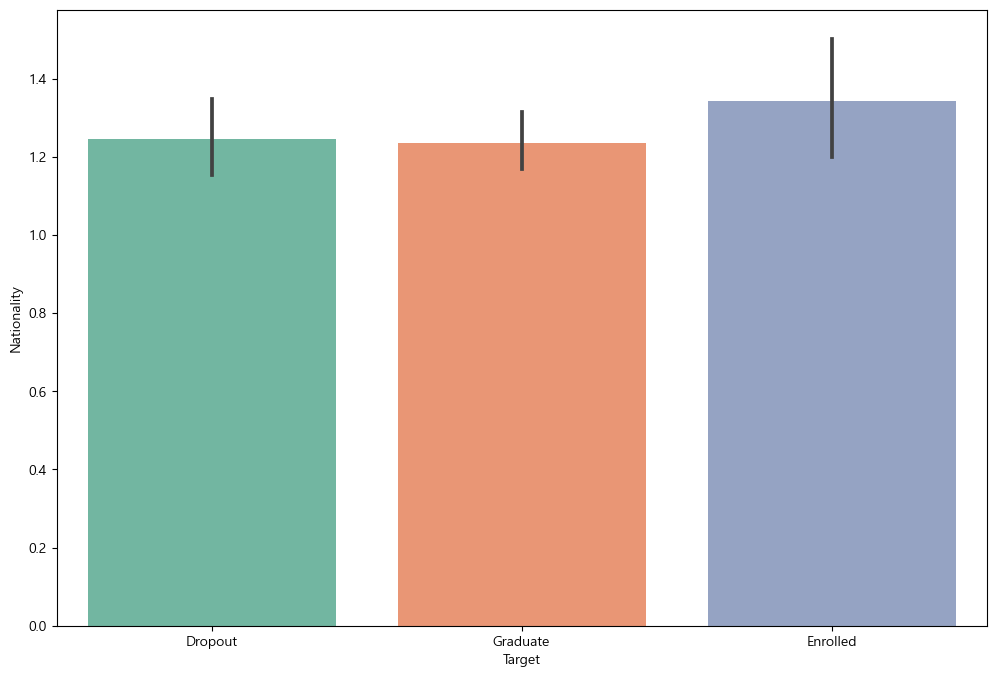

In [162]:
# 그래프 그리기

sns.barplot(dropout, x='Target', y='Nationality', palette='Set2')

# plotly로 막대그래프 그리기
- Target별 성비

In [ ]:
pivot_df = pd.DataFrame()

In [ ]:
# 그래프 그리기


## 결혼 상태에 따른 Target 변수 비율

In [ ]:
# 그래프 그리기


### 결혼 상태에 따른 Target 변수 비율 구하기 -> plotly 라이브러리 사용

In [ ]:
def change_matrial_val(values):
    if values == 1:
        return 'Single'
    elif values == 2:
        return 'Married'
    elif values == 3:
        return 'Widower'
    elif values == 4:
        return 'Divorced'
    elif values == 5:
        return 'Facto Union'
    elif values == 6:
        return 'Legally Seperated'

In [ ]:
# 그래프 그리기


## 전공에 따른 Target 비율

In [ ]:
course_remove = pd.DataFrame()


course_remove = course_remove.rename(index={
    1:'Biofuel Production Technologies',
    2:'Animation and Multimedia Design',
    3:'Social Service (Evening Attendance)',
    4:'Agronomy',5:'Communication Design',
    6:'Veterinary Nursing',
    7:'Informatics Engineering',
    8:'Equiniculture',
    9:'Management',
    10:'Social Service',
    11:'Tourism',
    12:'Nursing',
    13:'Oral Hygiene',
    14:'Advertising and Marketing Management',
    15:'Journalism and Communication',
    16:'Basic Education',
    17:'Management (Evening Attendance)'})

In [ ]:
# 열을 기준으로 각 범주별 총합 계산


# 총합을 기준으로 오름차순 정렬


In [ ]:
# 그래프 그리기


### 전공에 따른 Target 비율 -> plotly 라이브러리 사용

In [ ]:
course_df = pd.DataFrame()

In [ ]:
name_list = ['Biofuel Production Technologies',
    'Animation and Multimedia Design',
    'Social Service (Evening Attendance)',
    'Agronomy',
    'Communication Design',
    'Veterinary Nursing',
    'Informatics Engineering',
    'Equiniculture',
    'Management',
    'Social Service',
    'Tourism',
    'Nursing',
    'Oral Hygiene',
    'Advertising and Marketing Management',
    'Journalism and Communication',
    'Basic Education',
    'Management (Evening Attendance)']

In [ ]:
# 그래프 그리기


### 국적에 따른 Target 비율

- 포르투칼인이 압도적으로 많아 예측률에 큰 영향은 못 줄 것으로 보임

In [ ]:
nation_df = pd.DataFrame()

In [ ]:
nation_df = nation_df.rename(index={1:'Portuguese',
                                    2:'German',
                                    3:'Spanish',
                                    4:'Italian',
                                    5:'Dutch',
                                    6:'English',
                                    7:'Lithuanian',
                                    8:'Angolan',
                                    9:'Cape Verdean',
                                    10:'Guinean',
                                    11:'Mozambican',
                                    12:'Santomean',
                                    13:'Turkish',
                                    14:'Brazilian',
                                    15:'Romanian',
                                    16:'Moldova',
                                    17:'Mexican',
                                    18:'Ukrainian',
                                    19:'Russian',
                                    20:'Cuban', 
                                    21:'Colombian'})

In [ ]:
# 그래프 그리기


### 국적에 따른 Target 비율 -> plotly 라이브러리 사용

In [ ]:
# 그래프 그리기


## 연령대 분포도 그리기

In [ ]:
# 그래프 그리기


### 연령대 분포도 그리기 -> plotly 라이브러리 사용

In [ ]:
import plotly.figure_factory as ff

In [ ]:
# 그래프 그리기


# ------------------------------------------------------------------------------------------------------------

# 히트맵 그리기 -> 변수 선택

In [ ]:
# 인구통계학 데이터

demo_data = dropout_remove[["Marital status", "Nationality", "Displaced", "Gender", "Age at enrollment", "International", "Target"]]

# 사회-경제 데이터
se_data = dropout_remove[["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", "Educational special needs", "Debtor", "Tuition fees up to date", "Scholarship holder", "Target"]]

# 미시경제 데이터
me_data = dropout_remove[['Unemployment rate', 'Inflation rate', 'GDP', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Target']]

# 학업 데이터
academic_data = dropout_remove[['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Target']]

### 인구통계학 데이터 히트맵

In [ ]:
# 그래프 그리기


### 사회-경제 데이터 히트맵

In [ ]:
# 그래프 그리기


### 미시경제 데이터 히트맵

In [ ]:
# 그래프 그리기


### 학업 데이터 히트맵

In [ ]:
# 그래프 그리기


# 변수 선택

- 중복성 제거와 과적합 방지를 위해 유사한 상관계수를 가진 변수들 제거

In [ ]:
# 삭제 필요한 컬럼 리스트


# -------------------------------------------------------------------------------------------------------------

# 데이터 처리

1. 컬럼별 타입 확인
- 문자형, 수치형 확인

2. 컬럼별 결측치 확인
- 컬럼별 결측치 비율 확인 후 제거 판별

3. 결측치 대체 방법 확인
- 문자형(빈도) / 수치형(평균, 최대/최소값, 최빈값 등)

4. 결측치 대치 후 최종 확인
- 결측치 유무 확인

5. 변수 선택
- 상관분석 등 기타 분석을 통해 변수 선택 및 제거 진행

6. 최종 데이터 확인
- 모델 학습 및 테스트를 위한 최종 데이터 확인

# -------------------------------------------------------------------------------------------------------------

# Modeling

### Label Encoding -> Categorical variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, classification_report

import copy

### 범주형 변수 - Label Encoding

### target variable & input variable 나누기

### Feature Scaling

### Split train / test dataset

### Build Model

In [ ]:
# 모델 불러오기, 정의


# 학습 데이터로 모델(Decision Tree) 학습


# 학습된 모델로 test 결과값 출력


### 예측 결과 확인 (모델 성능 평가)

### * average 옵션

1. micro : 전체 평균
2. macro : 라벨 별 각 합의 평균
3. None : 각 라벨별 평균

### Accuracy, Precision, Recall 계산

### Roc 커브 그리기